In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.fft import fft, fftfreq

In [3]:
#a
def dft(x):
    N=len(x)
    sum=[0]*N
    for i in range(N):
        for j in range(N):
            sum[i]=sum[i]+x[j]*np.exp(-2*1j*np.pi*i*j/N)
    return np.round(sum)

In [4]:
x=[1,3,4,95,16,6,64,198]
print(dft(x))

[ 387.  +0.j   56.+135.j  -51.+284.j  -86. +15.j -217.  -0.j  -86. -15.j
  -51.-284.j   56.-135.j]


In [5]:
#b
def bitsize(x):
    return int(math.log(len(x),2))

In [6]:
def bitrev(x,size):
    binary=bin(x)
    reverse=binary[-1:1:-1]
    reverse=reverse+'0'*(size-len(reverse))
    return int(reverse,2)

In [7]:
def mfft(x):
    l=bitsize(x)
    xrev=[0]*len(x)
    X=[0]*len(x)
    #X1=[0]*len(x)
    #X2=[0]*len(x)
    arr1=[0]*int(len(x)/2)
    arr2=[0]*int(len(x)/2)
    stage=int(math.log(len(x),2))
    for i in range(len(x)):
        xrev[i]=x[bitrev(i,l)]
    for i in range(stage):
        sum=0
        for n in range(2**i):
            arr1[n]=sum
            sum=sum+1
        for n in range(2**i,int(len(x)/2)):
            arr1[n]=arr1[n-(2**i)]+2**(i+1)
        for n in range(int(len(x)/2)):
            arr2[n]=arr1[n]+2**i
        #print(f"{i+1}th stage addition indexes={arr1}")
        #print(f"{i+1}th stage subtraction indexes={arr2}")
        k=0
        w=np.exp(-1j*2*np.pi/2**(i+1))
        for n in range(int(len(x)/2)):
            if k<2**i:
                X[arr1[n]]=xrev[arr2[n]]*(w**k)+xrev[arr1[n]]
                #X1[arr1[n]]=xrev[arr2[n]]*(w**k)+xrev[arr1[n]]
                #print(f"{i+1}th stage addition portion w**k={np.round(w**k,3)}")
                k=k+1
            else:
                k=0
                X[arr1[n]]=xrev[arr2[n]]*(w**k)+xrev[arr1[n]]
                #X1[arr1[n]]=xrev[arr2[n]]*(w**k)+xrev[arr1[n]]
                #print(f"{i+1}th stage addition portion w**k={np.round(w**k,3)}")
                k=k+1
        #print(f"{i+1}th stage addition portion={np.round(X1)}")
        k=0
        for n in range(int(len(x)/2)):
            if k<2**i:
                X[arr2[n]]=xrev[arr1[n]]-(w**k)*xrev[arr2[n]]
                #X2[arr2[n]]=xrev[arr1[n]]-(w**k)*xrev[arr2[n]]
                #print(f"{i+1}th stage subtraction portion w**k={np.round(w**k,3)}")
                k=k+1
            else:
                k=0
                X[arr2[n]]=xrev[arr1[n]]-(w**k)*xrev[arr2[n]]
                #X2[arr2[n]]=xrev[arr1[n]]-(w**k)*xrev[arr2[n]]
                #print(f"{i+1}th stage subtraction portion w**k={np.round(w**k,3)}")
                k=k+1
        #print(f"{i+1}th stage subtraction portion={np.round(X2)}")
        for n in range(len(x)):
            xrev[n]=X[n]
    return np.round(X)

In [8]:
#c
print(mfft(x))
print(np.round(fft(x)))

[ 387.  +0.j   56.+135.j  -51.+284.j  -86. +15.j -217.  +0.j  -86. -15.j
  -51.-284.j   56.-135.j]
[ 387.  -0.j   56.+135.j  -51.+284.j  -86. +15.j -217.  -0.j  -86. -15.j
  -51.-284.j   56.-135.j]


In [10]:
#d
fs=1024
t=np.arange(0, 10, 1/fs);
y1=10*(np.sin(2*np.pi*5*t))
y2=30*(np.sin(2*np.pi*15*t))
y3=40*(np.sin(2*np.pi*50*t))

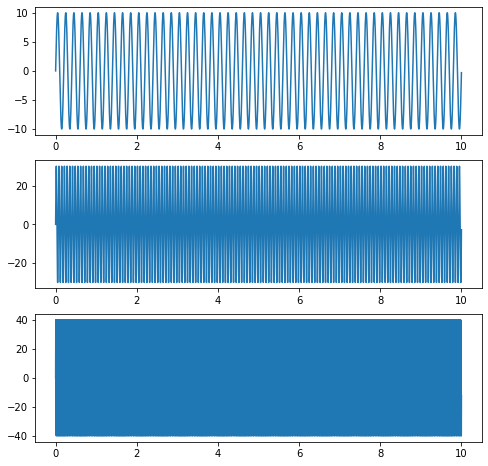

In [11]:
fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(8,8))
ax1.plot(t,y1)
ax2.plot(t,y2)
ax3.plot(t,y3)

<StemContainer object of 3 artists>

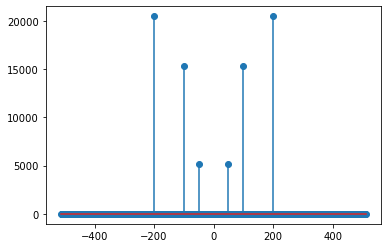

In [12]:
y=[0]*fs
for i in np.arange(fs):
    y[i]=(10*(np.sin(2*np.pi*50*i/fs))+30*(np.sin(2*np.pi*100*i/fs))+40*(np.sin(2*np.pi*200*i/fs)))
Y=fft(y)
f=fftfreq(len(y))*fs
plt.stem(f, np.abs(Y))